In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 颜色空间，從原本的BGR變RGB
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# 繪製辨識框
def detect_faces(f_cascade, colored_img, scaleFactor, minNeighbors):
    # 複製圖片以利後續加上方框不更改原始圖片
    img_copy = colored_img.copy()          
 
    # 轉為灰階圖像
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
    # 檢測多尺度（一些圖像可能比其他圖像更接近相機）圖像
    ## scaleFactor 每次搜尋方塊減少的比例(size越來越小)
    ## minNeighbors 每個目標至少檢測到幾次以上，才可被認定是真數據。
    faces = f_cascade.detectMultiScale(gray, scaleFactor = scaleFactor, minNeighbors = minNeighbors);          
    
    # 將灰階影像轉回 RGB
    img_copy = convertToRGB(img_copy)
    
    # 找出方框
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 5)
        print([x, y, x+w, y+h])
        
    # 輸出找到人臉數、圖像
    print('Faces found:', len(faces))
    plt.figure(figsize = (20, 20))
    plt.imshow(img_copy)

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


[2020, 1304, 2346, 1630]
[631, 1890, 779, 2038]
[880, 1937, 1112, 2169]
[336, 1967, 500, 2131]
[1317, 1986, 1513, 2182]
Faces found: 5


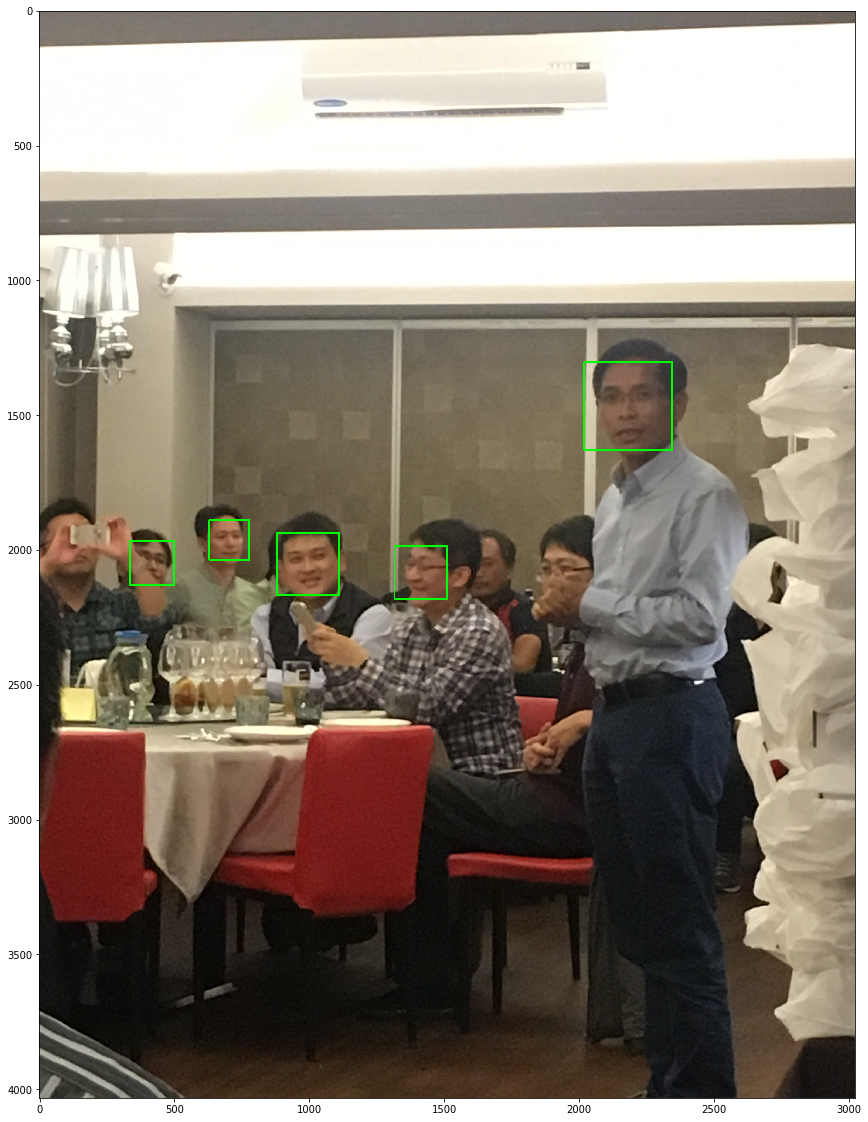

In [4]:
# 調用訓練好的 haarcascade model
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

# Test
test5 = cv2.imread('data/test5.jpg')  
faces_detected_img = detect_faces(haar_face_cascade, test5, 1.2, 3)  

[2004, 1290, 2350, 1636]
[620, 1884, 784, 2048]
[882, 1937, 1112, 2167]
Faces found: 3


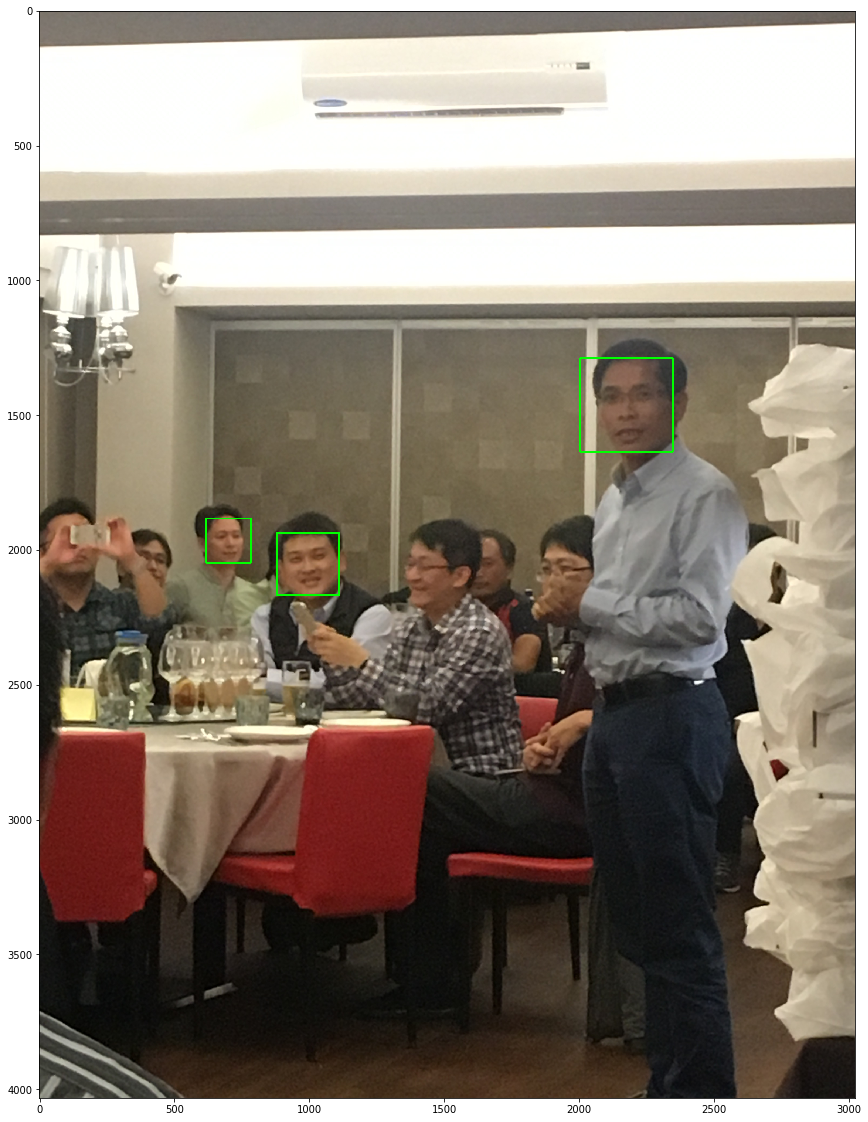

In [5]:
# 調用訓練好的 lbpcascade model
haar_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

# Test
test5 = cv2.imread('data/test5.jpg')  
faces_detected_img = detect_faces(haar_face_cascade, test5, 1.3, 3)  